In [ ]:

import tensorflow as tf
gpu = tf.config.experimental.list_physical_devices('GPU') # 내 컴에 장착된 GPU를 list로 반환
try:
    tf.config.experimental.set_memory_growth(gpu[0], True) # GPU Memory Growth를 Enable
except RuntimeError as e:
    print(e) # Error 발생하면 Error 내용 출력

In [1]:
from summarizer.domain.model.video import Video
import matplotlib

2022-05-11 22:06:58.545986: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-11 22:06:58.546115: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


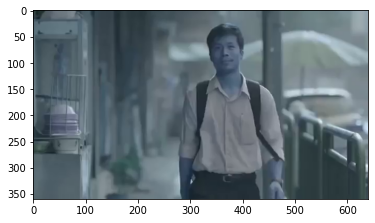

In [2]:
video = Video(key="123",url="tests/2.mp4", algorithm="yolov3")
images = video._read_video()
idx, image = next(images)
print(image)
import cv2
matplotlib.pyplot.imshow(image.frame)


In [ ]:

features = image.extract()
print(features)
from summarizer.domain.model.feature import VideoFeature
videofeature = VideoFeature(key="123",features=features)

In [ ]:
video = Video(key="123",url="tests/2.mp4", algorithm="yolov3")
list_of_features = video.extract_feature()
video.shorten(video_feature=list_of_features, must_include_feature=["person"])

In [ ]:
import boto3


def create_movie_table(dynamodb=None):
    if not dynamodb:
        dynamodb = boto3.resource('dynamodb', endpoint_url="http://localhost:8000")

    table = dynamodb.create_table(
        TableName='Video',
        KeySchema=[
            {
                'AttributeName': 'key',
                'KeyType': 'HASH'  # Partition key
            },
        ],
        AttributeDefinitions=[
            {
                'AttributeName': 'key',
                'AttributeType': 'S'
            },
        ],
        ProvisionedThroughput={
            'ReadCapacityUnits': 10,
            'WriteCapacityUnits': 10
        }
    )
    return table


if __name__ == '__main__':
    movie_table = create_movie_table()
    print("Table status:", movie_table.table_status)

In [5]:
import boto3
from summarizer.infrastructure.repository import VideoRepository
dynamodb = boto3.resource('dynamodb', endpoint_url="http://localhost:8000")
videeoTable = dynamodb.Table('Video')
repo = VideoRepository(dynamodb, algorithm='yolov3')

In [7]:
videeoTable.scan()

{'Items': [{'end_time': None,
   'start_time': '2022/05/11 22:07:15',
   'key': '2022/05/11 22:07:15',
   'url': 'tests/2.mp4',
   'status': 'start'}],
 'Count': 1,
 'ScannedCount': 1,
 'ResponseMetadata': {'RequestId': '375f15a7-d5e8-4a35-b09b-249bb109e1c2',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Wed, 11 May 2022 13:07:25 GMT',
   'content-type': 'application/x-amz-json-1.0',
   'x-amz-crc32': '2530412319',
   'x-amzn-requestid': '375f15a7-d5e8-4a35-b09b-249bb109e1c2',
   'content-length': '189',
   'server': 'Jetty(9.4.18.v20190429)'},
  'RetryAttempts': 0}}

In [ ]:
videeoTable.get_item(Key={"key":'2022/04/10 00:15:44'[Item]])

In [6]:
repo.put(data=video)

key='2022/05/11 22:07:15' url='tests/2.mp4' status='start' start_time='2022/05/11 22:07:15' end_time=None


In [ ]:
print(x)

In [ ]:
x = movie_table.get_item(Key={"key":'abc'})

In [11]:
print(VideoFeature(**x['Item']))

NameError: name 'VideoFeature' is not defined

In [8]:
from summarizer.infrastructure.redis_listener import RedisListener
from redis import Redis
import json
redis = Redis(host="127.0.0.1", port="6379")
from summarizer.service.command import ExtractFeature
string = json.dumps(ExtractFeature(type="ExtractFeature", key='2022/05/11 22:07:15').dict())
print(string,type(string))
redis.lpush('summarizer',string)
# x = redis.rpop('summarizer')
# x = json.loads(x)
# print(type(x), x)


{"type": "ExtractFeature", "key": "2022/05/11 22:07:15"} <class 'str'>


2

In [13]:
featureTable = dynamodb.Table('Feature')

In [14]:
featureTable.scan()

{'Items': [{'features': [{'name': 'person',
     'current_frame': Decimal('25'),
     'percentage_probability': Decimal('99.74884390830994'),
     'box_points': [Decimal('277'),
      Decimal('75'),
      Decimal('541'),
      Decimal('380')]},
    {'name': 'backpack',
     'current_frame': Decimal('25'),
     'percentage_probability': Decimal('50.57525634765625'),
     'box_points': [Decimal('326'),
      Decimal('204'),
      Decimal('494'),
      Decimal('381')]},
    {'name': 'handbag',
     'current_frame': Decimal('25'),
     'percentage_probability': Decimal('55.981528759002686'),
     'box_points': [Decimal('298'),
      Decimal('180'),
      Decimal('367'),
      Decimal('365')]},
    {'name': 'person',
     'current_frame': Decimal('50'),
     'percentage_probability': Decimal('99.73055124282837'),
     'box_points': [Decimal('219'),
      Decimal('74'),
      Decimal('511'),
      Decimal('380')]},
    {'name': 'backpack',
     'current_frame': Decimal('50'),
     'percentag